# EOFs feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and carry out an EOF analysis in oder to identify the leading patterns of feedback response. The input of this EOF analysis consists of the feedbacks anomaly matrix (N members x lat/lon position). 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# Read files : radiative budget, tas

In [3]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']


len(nb_p_list)

68

In [4]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
filename='*_amip_*.nc'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiment : 

#path=path_official
#official_amip = get_3D_xarr(path, filename, variables)
#official_amip_SW = get_3D_SW_xarr(path, filename, variables)
#official_amip_LW = get_3D_LW_xarr(path, filename, variables)
#official_amip_N = get_3D_budget_xarr(path, filename, variables)

#path=path_PPE+'CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
#p1_amip = get_3D_xarr(path, filename, variables)
#p1_amip_SW = get_3D_SW_xarr(path, filename, variables)
#p1_amip_LW = get_3D_LW_xarr(path, filename, variables)
#p1_amip_N = get_3D_budget_xarr(path, filename, variables)


# List, à changer en fonction de ce que l'on veut regarder :
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

# List sans les outliers
#nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
#            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
#            'p133',  'p193', 'p13',  'p195', 'p140', 'p142', 'p58', \
#            'p144', 'p148', 'p14', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
#            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p294', \
#            'p297', 'p2', 'p4'] # Fin du premier petit ensemble

# List avec les outliers 
#nb_p_list = ['p105','p30','p65','p15','p109','p160','p34','p111', \
#            'p36','p122','p39','p83','p123','p88','p184','p131','p49', \
#            'p133','p193','p13','p195','p93','p140','p57','p142','p58', \
#            'p144','p148','p14','p209','p216','p218','p222','p227','p244', \
#            'p245','p249','p254','p255','p262','p269','p279','p281','p287','p294', \
#            'p297','p2','p4']


N=len(nb_p_list)
amip={}
amip_SW={}
amip_LW={}
amip_N={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip_LHS500_PPE/CNRM-CM6-1_amip_r1i1'+str(nb_p)+'f2/'
    amip[str(nb_p)] = get_3D_xarr(path, filename, variables)
    amip_SW[str(nb_p)] = get_3D_SW_xarr(path, filename, variables)
    amip_LW[str(nb_p)] = get_3D_LW_xarr(path, filename, variables)
    amip_N[str(nb_p)] = get_3D_budget_xarr(path, filename, variables)
    i=i+1             

p311


OSError: no files to open

In [ ]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
filename='*_amip-future4K_*.nc'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip-future4K experiment : 

#path=path_official
#official_future4K = get_3D_xarr(path, filename, variables)
#official_future4K_SW = get_3D_SW_xarr(path, filename, variables)
#official_future4K_LW = get_3D_LW_xarr(path, filename, variables)
#official_future4K_N = get_3D_budget_xarr(path, filename, variables)

#path=path_PPE+'CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1p1f2/'
#p1_future4K = get_3D_xarr(path, filename, variables)
#p1_future4K_SW = get_3D_SW_xarr(path, filename, variables)
#p1_future4K_LW = get_3D_LW_xarr(path, filename, variables)
#p1_future4K_N = get_3D_budget_xarr(path, filename, variables)


# List, à changer en fonction de ce que l'on veut regarder :
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

# List sans les outliers
#nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
#            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
#            'p133',  'p193', 'p13',  'p195', 'p140', 'p142', 'p58', \
#            'p144', 'p148', 'p14', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
#            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p294', \
#            'p297', 'p2', 'p4'] # Fin du premier petit ensemble

# List avec les outliers 
#nb_p_list = ['p105','p30','p65','p15','p109','p160','p34','p111', \
#            'p36','p122','p39','p83','p123','p88','p184','p131','p49', \
#            'p133','p193','p13','p195','p93','p140','p57','p142','p58', \
#            'p144','p148','p14','p209','p216','p218','p222','p227','p244', \
#            'p245','p249','p254','p255','p262','p269','p279','p281','p287','p294', \
#            'p297','p2','p4']

N=len(nb_p_list)
future4K={}
future4K_SW={}
future4K_LW={}
future4K_N={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip-future4K_LHS500_PPE/CNRM-CM6-1_amip-future4K_r1i1'+str(nb_p)+'f2/'
    future4K[str(nb_p)] = get_3D_xarr(path, filename, variables)
    future4K_SW[str(nb_p)] = get_3D_SW_xarr(path, filename, variables)
    future4K_LW[str(nb_p)] = get_3D_LW_xarr(path, filename, variables)
    future4K_N[str(nb_p)] = get_3D_budget_xarr(path, filename, variables)
    i=i+1
    
nb_p_LHSlist = ['p301',  'p302',  'p304',  'p308', 'p309', 'p311', 'p312', 'p314', 'p316',
            'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
            'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
            'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
            'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
            'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
            'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
            'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
            'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
            'p406', 'p407', 'p409', 'p410', 'p411', 'p412']


# Compute : Delta(TOA), Delta(tas), Lambda

In [ ]:
DeltaT_ensemble = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/DeltaT_global_mean.npy")
DeltaT_ensemble_mean = DeltaT_ensemble.mean()
DeltaT_ensemble_mean

In [5]:
# We want to compute the Deltas and the feedbacks of each perturbations (amip - amip-future4K)

n=len(nb_p_list)

SW=[0]*(n)
LW=[0]*(n)
N=[0]*(n)

#official_Delta_tas = official_future4K['tas'] - official_amip['tas']
#official_Delta_SW = official_future4K_SW - official_amip_SW
#official_Delta_LW = official_future4K_LW - official_amip_LW
#official_Delta_N = official_future4K_N - official_amip_N
#SW[0] = official_Delta_SW/DeltaT_ensemble_mean
#LW[0] = official_Delta_LW/DeltaT_ensemble_mean
#N[0] = official_Delta_N/DeltaT_ensemble_mean

#p1_Delta_tas = p1_future4K['tas'] - p1_amip['tas']
#p1_Delta_SW = p1_future4K_SW - p1_amip_SW
#p1_Delta_LW = p1_future4K_LW - p1_amip_LW
#SW[1] = p1_Delta_SW/p1_Delta_tas
#LW[1] = p1_Delta_LW/p1_Delta_tas


i = 0
while i<n:
    nb_p = nb_p_list[i]
    print(nb_p)
    Delta_tas = future4K[str(nb_p)]['tas'] - amip[str(nb_p)]['tas']
    Delta_SW = future4K_SW[str(nb_p)] - amip_SW[str(nb_p)] 
    Delta_LW = future4K_LW[str(nb_p)] - amip_LW[str(nb_p)] 
    Delta_N = future4K_N[str(nb_p)] - amip_N[str(nb_p)]
    #j=i+1
    SW[i] = Delta_SW/DeltaT_ensemble_mean
    LW[i] = Delta_LW/DeltaT_ensemble_mean
    N[i] = Delta_N/DeltaT_ensemble_mean
    i+=1

p311


NameError: name 'future4K' is not defined

# Create EOF input matrix

In [7]:
SW_matrix = xr.combine_nested(SW, concat_dim=['time'])
SW_matrix

<xarray.DataArray (time: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

In [8]:
LW_matrix = xr.combine_nested(LW, concat_dim=['time'])
LW_matrix

<xarray.DataArray 'rlut' (time: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

In [9]:
N_matrix = xr.combine_nested(N, concat_dim=['time'])
N_matrix

<xarray.DataArray (time: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

# EOF analysis (N)

In [10]:
# Pondérer par cosinus de latitude : 
lats = N_matrix['lat'][:]
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts_N = np.sqrt(coslat).drop(labels='height').values
W_N =wgts_N[np.newaxis,:,np.newaxis]
W_N

array([[[0.13679714],
        [0.20723052],
        [0.25940918],
        [0.30271101],
        [0.34048839],
        [0.37438938],
        [0.40536657],
        [0.43402829],
        [0.46079044],
        [0.4859518 ],
        [0.50973526],
        [0.53231206],
        [0.553817  ],
        [0.57435825],
        [0.59402409],
        [0.61288755],
        [0.63100977],
        [0.6484425 ],
        [0.66522991],
        [0.68141001],
        [0.69701574],
        [0.71207583],
        [0.72661548],
        [0.74065688],
        [0.7542197 ],
        [0.76732142],
        [0.77997763],
        [0.79220229],
        [0.80400795],
        [0.81540589],
        [0.82640631],
        [0.83701843],
        [0.84725061],
        [0.85711046],
        [0.86660488],
        [0.87574018],
        [0.8845221 ],
        [0.89295589],
        [0.90104636],
        [0.90879791],
        [0.91621456],
        [0.92329999],
        [0.9300576 ],
        [0.93649048],
        [0.94260146],
        [0

In [11]:
# Compute anomalies by removing the time-mean.
N_mean = N_matrix.mean(axis=0)
N_anom = N_matrix - N_mean
N_anom

<xarray.DataArray (time: 68, lat: 128, lon: 256)>
dask.array<sub, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

In [12]:
# Create an EOF solver to do the EOF analysis. 
solver = Eof(N_anom, weights=W_N)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SW feedbacks at each grid point, and the
# leading PC time series itself.
eof = solver.eofsAsCovariance(neofs=3, pcscaling=1)
pc = solver.pcs(pcscaling=1)

In [13]:
varFrac = solver.varianceFraction(neigs=3)
varFrac

<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.25492045, 0.06946535, 0.05246741], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

### EOF 1 : plotting N 

In [14]:
eof = eof*-1
pc = pc*-1

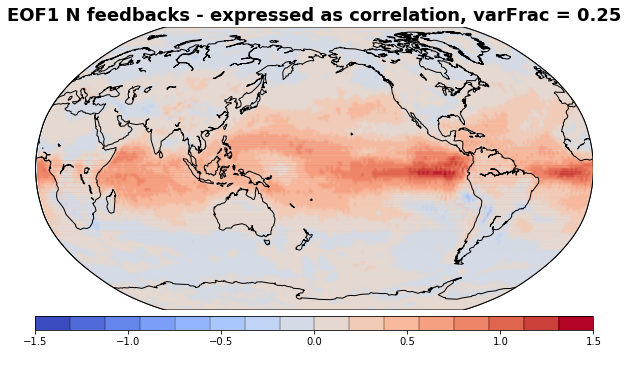

In [15]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = N_anom['lat'][:]
lon = N_anom['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof[0]
ax.set_title("EOF1 N feedbacks - expressed as correlation, varFrac = 0.25", fontsize=18, 
             fontweight = 'bold')

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-1.5, 1.5)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF1map_N.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

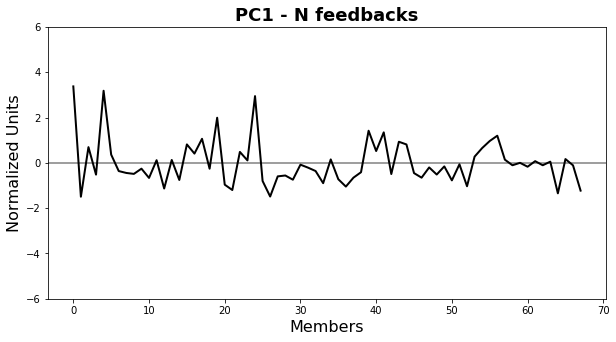

In [16]:
#pc = solver.pcs(pcscaling=1)
#pc = pc*-1

# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc[:, 0].plot(color='black', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k', alpha=0.5)
#ax.axvline(x=(8+1), color='red', alpha=0.5)
#ax.axvline(x=(11+1), color='red', alpha=0.5)
#ax.axvline(x=(23+1), color='red', alpha=0.5)
ax.set_ylim(-6, 6)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC1 - N feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF1pc_N.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [17]:
pc1 = pc[:, 0]

In [24]:
# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/EOF1.npy', pc1)

### EOF 2 : plotting N

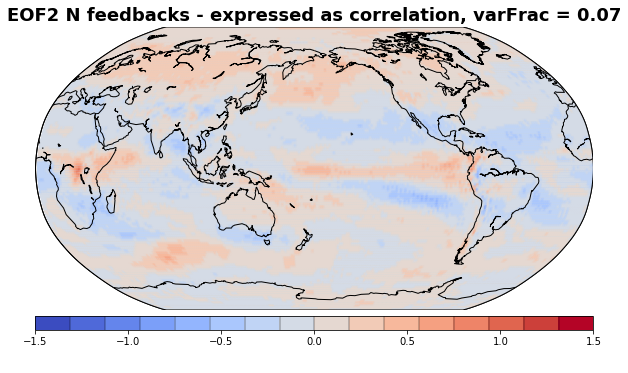

In [18]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof['lat'][:]
lon = eof['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof[1]*-1
ax.set_title("EOF2 N feedbacks - expressed as correlation, varFrac = 0.07", fontsize=18, 
             fontweight = 'bold')

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-1.5, 1.5)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF2map_N.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

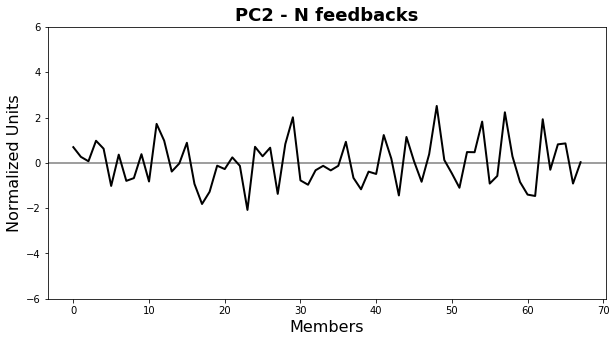

In [19]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc[:, 1].plot(color='black', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k', alpha=0.5)
#ax.axvline(x=(8+1), color='red', alpha=0.5)
#ax.axvline(x=(11+1), color='red', alpha=0.5)
#ax.axvline(x=(23+1), color='red', alpha=0.5)
ax.set_ylim(-6, 6)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC2 - N feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF2pc_N.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

### EOF 3 : plotting N

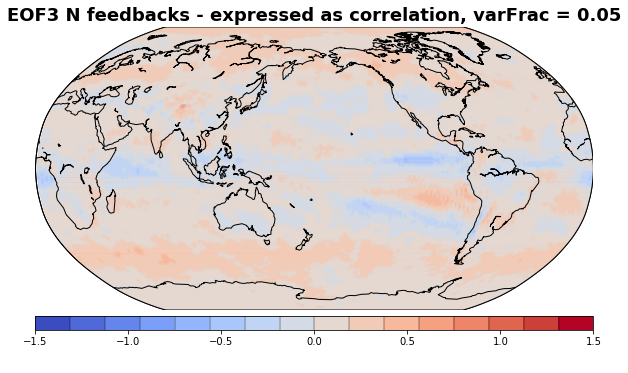

In [20]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = eof['lat'][:]
lon = eof['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eof[2]
ax.set_title("EOF3 N feedbacks - expressed as correlation, varFrac = 0.05", fontsize=18, 
             fontweight = 'bold')

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-1.5, 1.5)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF3map_N.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

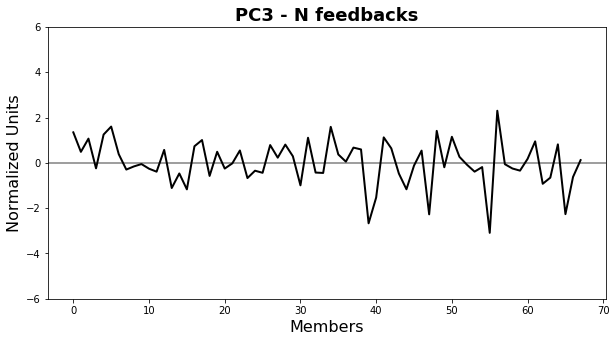

In [21]:
pc=pc*-1

# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
pc[:, 2].plot(color='black', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k', alpha=0.5)
#ax.axvline(x=(8+1), color='red', alpha=0.5)
#ax.axvline(x=(11+1), color='red', alpha=0.5)
#ax.axvline(x=(23+1), color='red', alpha=0.5)
ax.set_ylim(-6, 6)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC3 - N feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF3pc_N.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

# Multivariate EOF analysis (LW, SW)

In [10]:
# Pondérer par cosinus de latitude : 
lats = LW_matrix['lat'][:]
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts_LW = np.sqrt(coslat).drop(labels='height').values
W =wgts_LW[np.newaxis,:,np.newaxis]
W

array([[[0.13679714],
        [0.20723052],
        [0.25940918],
        [0.30271101],
        [0.34048839],
        [0.37438938],
        [0.40536657],
        [0.43402829],
        [0.46079044],
        [0.4859518 ],
        [0.50973526],
        [0.53231206],
        [0.553817  ],
        [0.57435825],
        [0.59402409],
        [0.61288755],
        [0.63100977],
        [0.6484425 ],
        [0.66522991],
        [0.68141001],
        [0.69701574],
        [0.71207583],
        [0.72661548],
        [0.74065688],
        [0.7542197 ],
        [0.76732142],
        [0.77997763],
        [0.79220229],
        [0.80400795],
        [0.81540589],
        [0.82640631],
        [0.83701843],
        [0.84725061],
        [0.85711046],
        [0.86660488],
        [0.87574018],
        [0.8845221 ],
        [0.89295589],
        [0.90104636],
        [0.90879791],
        [0.91621456],
        [0.92329999],
        [0.9300576 ],
        [0.93649048],
        [0.94260146],
        [0

In [11]:
SW_val = SW_matrix.values
LW_val = LW_matrix.values

# Compute anomalies by removing the time-mean.
SW_mean = SW_val.mean(axis=0)
SW_anom = SW_val - SW_mean
SW_anom

# Compute anomalies by removing the time-mean.
LW_mean = LW_val.mean(axis=0)
LW_anom = LW_val - LW_mean

# Compute the multivariate EOF :
msolver = MultivariateEof([LW_anom, SW_anom], weights = [W,W]) #, weights = [W,W]
eofs_LW, eofs_SW = msolver.eofsAsCovariance(neofs=3)
pc = msolver.pcs(pcscaling=1)

In [12]:
varFrac = msolver.varianceFraction(neigs=3)
varFrac

array([0.31405294, 0.11123244, 0.06042568])

In [13]:
# Save the numpy array PCs in a file for the Multi Linear Regression   
Y_tmp=pc[0]
Y = Y_tmp[1:]
np.save('/data/home/globc/peatier/CNRMppe/PPE/Y_MultiLinReg.npy', Y)

In [14]:
time = SW_matrix['time']
mode = [1]*len(time)
PC = xr.DataArray(pc, coords=[time, mode], dims=['time', 'mode'])
PC[:,3]

<xarray.DataArray (time: 119)>
array([ 9.55026511e-01, -6.55631157e-01, -1.37400947e-01, -9.49191312e-01,
        1.24189570e-01, -2.82820746e-01,  1.33863162e-01, -2.84175247e-01,
        1.03035424e+00,  1.25530929e+00, -5.69281098e-01, -7.40078690e-01,
        3.92892690e+00,  2.07984483e-02,  1.75398518e+00,  8.04861588e-02,
       -6.80711975e-01, -3.20744957e-01, -6.69683783e-01, -6.74009531e-01,
        7.16527949e-02, -1.32171756e+00,  8.29945545e-01,  1.26640044e-01,
       -1.33044717e+00,  1.70711045e+00, -2.81899285e-01, -5.20345453e-01,
        6.33965219e-01, -8.38313562e-01, -4.81733634e-01, -1.27983710e+00,
        8.63267731e-01,  2.16118725e+00, -1.53699808e+00, -5.52412607e-02,
        2.16408812e-01,  1.20196918e-02, -6.32570100e-01, -7.77500932e-01,
       -6.36832907e-01, -1.68980579e+00,  1.02562797e+00,  1.22015133e+00,
       -4.28704906e-01,  2.52059813e-01,  1.22148003e+00, -1.43303543e+00,
        1.23125093e+00, -1.73056706e+00, -7.30361200e-01,  6.88755512e-01,
       -9.07181765e-01, -7.97586952e-01, -1.11020131e+00,  6.70053437e-02,
       -1.76191352e-01, -1.37661077e+00,  1.53737402e-02, -5.89501151e-01,
       -2.21510452e-01, -9.16554147e-01,  1.48789481e-03,  8.10577373e-01,
        1.08882708e+00, -1.20024022e+00,  1.39124995e+00, -6.86420584e-01,
       -6.97646490e-01, -4.31969149e-01,  1.24785012e+00, -8.23690078e-01,
       -7.07397904e-01,  7.87326865e-01, -2.62107034e-01,  2.33119915e+00,
       -6.38673354e-01,  1.32436909e+00, -7.85454871e-01, -7.08936210e-01,
       -5.81873343e-01,  1.90544252e+00, -1.15040070e+00,  6.34420773e-01,
       -6.46459904e-01,  2.71082728e-02, -7.82560084e-01,  6.88717964e-01,
       -3.56883906e-01, -7.64582474e-01,  1.67798181e+00,  1.48655312e+00,
        1.94827524e-01, -1.13706888e+00,  8.35651474e-01,  1.99242509e-01,
       -7.73216712e-01, -1.52404261e+00,  1.37287438e+00,  5.07880905e-02,
       -4.61243058e-01, -1.29083390e+00,  3.75241888e-01, -9.15109448e-01,
       -4.10979282e-01,  6.18393517e-01,  2.39149494e+00, -7.58805680e-01,
        8.35939178e-01,  2.61580409e-01, -2.57307937e-01,  9.68880036e-02,
       -4.72671460e-01, -4.01867427e-02,  1.07876931e+00, -1.74682925e-01,
        1.09115727e+00,  4.00948070e-01,  3.72673498e-01])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118
    mode     int64 1

### EOF 1 : plotting SW/LW

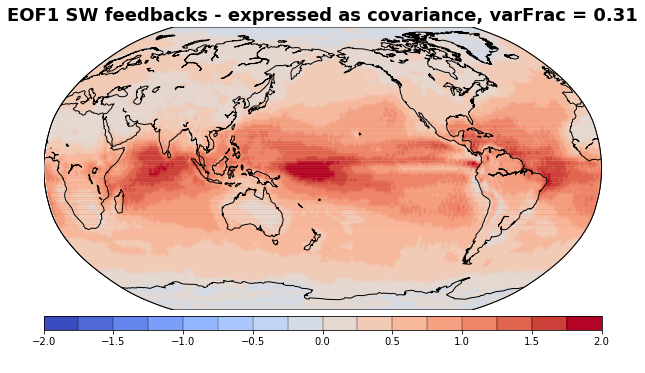

In [15]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = SW_matrix['lat'][:]
lon = SW_matrix['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eofs_SW[0]
ax.set_title("EOF1 SW feedbacks - expressed as covariance, varFrac = 0.31", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-2, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF1map_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

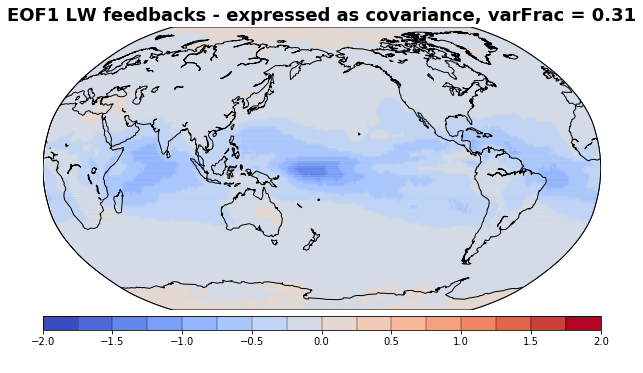

In [16]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = LW_matrix['lat'][:]
lon = LW_matrix['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eofs_LW[0]
ax.set_title("EOF1 LW feedbacks - expressed as covariance, varFrac = 0.31", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-2, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF1map_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

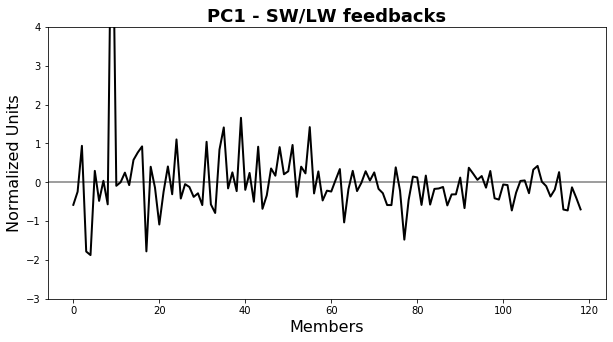

In [17]:
#PC=PC*-1

# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
PC[:, 0].plot(color='black', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k', alpha=0.5)
#ax.axvline(x=(8+1), color='red', alpha=0.5)
#ax.axvline(x=(11+1), color='red', alpha=0.5)
#ax.axvline(x=(23+1), color='red', alpha=0.5)
ax.set_ylim(-3, 4)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC1 - SW/LW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF1pc.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

PC=PC*-1

In [7]:
PC = np.load('/data/home/globc/peatier/CNRMppe/PPE/Y_MultiLinReg.npy')
out = PC.max()
cpt=0 
for i in PC: 
    if i==out: 
        index=cpt
        cpt+=1
    else:
        cpt+=1
index

116

In [12]:
nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
            'p133',  'p193', 'p13',  'p195', 'p140', 'p142', 'p58', \
            'p144', 'p148', 'p14', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p294', \
            'p297', 'p2', 'p4', # Fin du premier ensemble 
            'p301',  'p302',  'p304',  'p308', 'p309', 'p311', 'p312', 'p314', 'p316',
            'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
            'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
            'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
            'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
            'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
            'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
            'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
            'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
            'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

nb_p_list[(120 - 116+1)]

'p160'

In [19]:
feedbacks = np.load('Net_NoOut_feedbacks.npy')
len(feedbacks)
feedbacks

array([-1.46271811, -1.22435291, -1.52830167, -1.04906502, -1.18820584,
       -1.61871011, -1.37886817, -1.30043375, -1.29483607, -1.37834249,
       -1.37031124, -0.92680407, -0.98281853, -0.98992916, -1.63543904,
       -1.13137052, -1.53964751, -1.48673799, -1.62065396, -1.50224719,
       -0.92298657, -1.31983576, -1.39956973, -1.25996373, -1.32290912,
       -0.95455284, -1.34658101, -1.58671677, -1.69578278, -1.45951135,
       -1.44231882, -1.30141642, -1.31127388, -0.6922482 , -1.27174487,
       -1.32356207, -1.5346215 , -0.85968733, -1.46919267, -1.52906616,
       -1.0998301 , -1.2630197 , -0.50366904, -1.27755449, -1.00837696])

In [21]:
nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
            'p133',  'p193', 'p13',  'p195', 'p140', 'p142', 'p58', \
            'p144', 'p148', 'p14', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p294', \
            'p297', 'p2', 'p4', # Fin du premier ensemble 
            'p301',  'p302',  'p304',  'p308', 'p309', 'p311', 'p312', 'p314', 'p316',
            'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
            'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
            'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
            'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
            'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
            'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
            'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
            'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
            'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

cpt=0
for i in PC:
    if i>2:
        p=nb_p_list[cpt]
        cpt=cpt+1
    else:
        cpt=cpt+1

p

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### EOF 2 : plotting SW/LW 

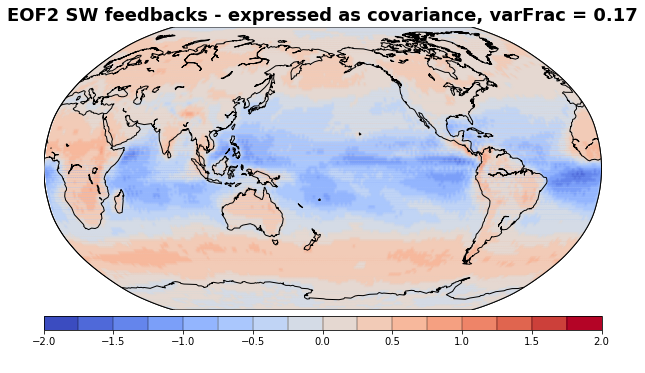

In [35]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = SW_matrix['lat'][:]
lon = SW_matrix['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eofs_SW[1]
ax.set_title("EOF2 SW feedbacks - expressed as covariance, varFrac = 0.17", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-2, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF2map_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

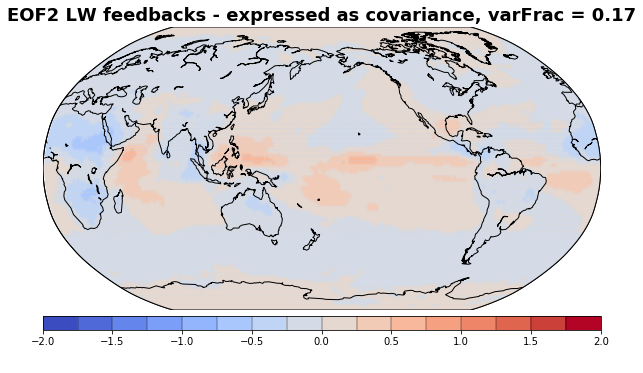

In [36]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = LW_matrix['lat'][:]
lon = LW_matrix['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eofs_LW[1]
ax.set_title("EOF2 LW feedbacks - expressed as covariance, varFrac = 0.17", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-2, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF2map_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

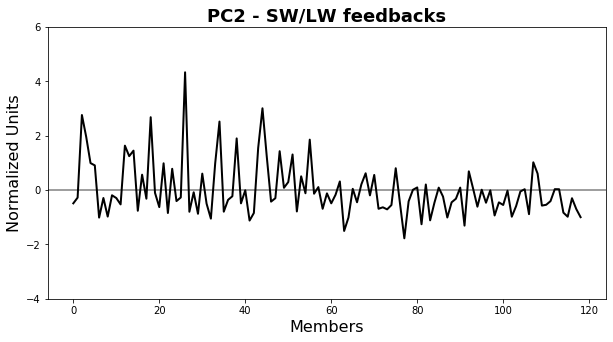

In [37]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
PC[:, 1].plot(color='black', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k', alpha=0.5)
#ax.axvline(x=(8+1), color='red', alpha=0.5)
#ax.axvline(x=(11+1), color='red', alpha=0.5)
#ax.axvline(x=(23+1), color='red', alpha=0.5)
ax.set_ylim(-4, 6)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC2 - SW/LW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF2pc.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

### EOF 3 : plotting SW/LW

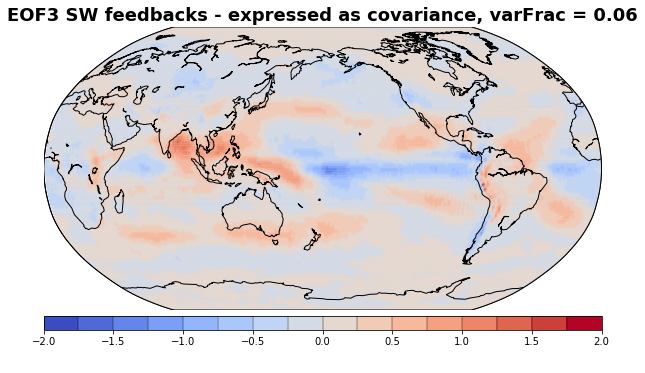

In [38]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = SW_matrix['lat'][:]
lon = SW_matrix['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eofs_SW[2]
ax.set_title("EOF3 SW feedbacks - expressed as covariance, varFrac = 0.06", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-2, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF3map_SW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

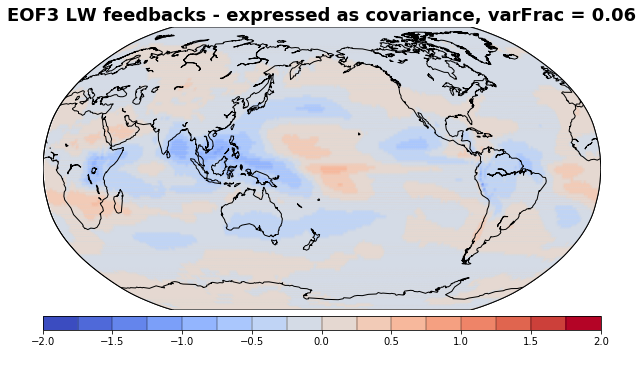

In [39]:
# Plot the leading EOF expressed as correlation in the Pacific domain.

lat = LW_matrix['lat'][:]
lon = LW_matrix['lon'][:]

fig = plt.figure(figsize=(10, 10))
ax=plt.gca()

data = eofs_LW[2]
ax.set_title("EOF3 LW feedbacks - expressed as covariance, varFrac = 0.06", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))

m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
x, y = m(*np.meshgrid(lon,lat))


cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
cbar.set_label(' ', size = 16, style = 'italic')

m.drawcoastlines()
m.drawmapboundary()
plt.clim(-2, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF3map_LW.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

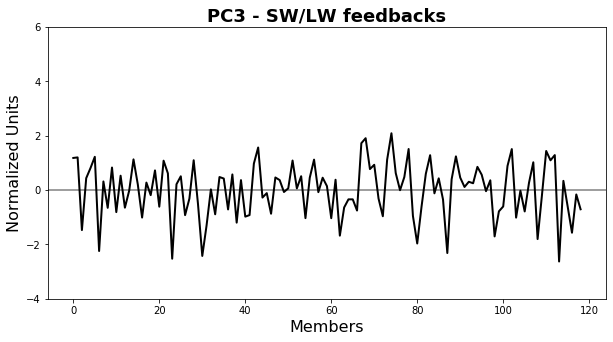

In [40]:
# Plot the leading PC time series.
plt.figure(figsize=(10, 5))
PC[:, 2].plot(color='black', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k', alpha=0.5)
#ax.axvline(x=(8+1), color='red', alpha=0.5)
#ax.axvline(x=(11+1), color='red', alpha=0.5)
#ax.axvline(x=(23+1), color='red', alpha=0.5)
ax.set_ylim(-4, 6)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel('Normalized Units', size = 16)
ax.set_title('PC3 - SW/LW feedbacks', fontsize=18, 
             fontweight = 'bold')

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_NoOut_EOF3pc.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()